# Multiclass classification with the Reuters Dataset

In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

## Let's have a look at the data

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [6]:
train_labels[10]

3

categories = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead'],

## Building a Neural Network to predict the category

In [7]:
def vectorize_newswires(newswires, dictsize=10000):
    results = np.zeros((len(newswires), dictsize))
    for newswireindex, wordlist in enumerate(newswires):
        for word in wordlist:
            results[newswireindex, word] = 1.
            
    return results

In [8]:
x_train = vectorize_newswires(train_data)

In [10]:
x_test = vectorize_newswires(test_data)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
one_hot_train_labels = to_categorical(train_labels)

In [13]:
one_hot_test_labels = to_categorical(test_labels)

In [14]:
one_hot_train_labels.shape

(8982, 46)

In [15]:
print(one_hot_train_labels[0,:])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
train_labels[0]

3

There are 46 categories in the output layer. In order to prevent information bottlenecks, each hidden layer should not have less than 46 units. The last softmax layer forces each unit to be between 0 and 1, and their sum to be 1 (for probabilities).

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Categorical crossentropy extends binary crossentropy to multiple categories.

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [20]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 79us/sample - loss: 2.6785 - accuracy: 0.5574 - val_loss: 1.7902 - val_accuracy: 0.6620
Epoch 2/20
7982/7982 [==============================] - 0s 37us/sample - loss: 1.4348 - accuracy: 0.7078 - val_loss: 1.3192 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 0s 31us/sample - loss: 1.0512 - accuracy: 0.7757 - val_loss: 1.1533 - val_accuracy: 0.7570
Epoch 4/20
7982/7982 [==============================] - 0s 26us/sample - loss: 0.8273 - accuracy: 0.8240 - val_loss: 1.0380 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 0s 26us/sample - loss: 0.6547 - accuracy: 0.8647 - val_loss: 0.9648 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 0s 26us/sample - loss: 0.5252 - accuracy: 0.8900 - val_loss: 0.9150 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 0s 26us/sample

In [23]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

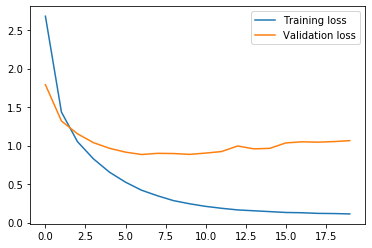

In [24]:
plt.plot(loss_values, label='Training loss')
plt.plot(val_loss_values, label='Validation loss')
plt.legend()

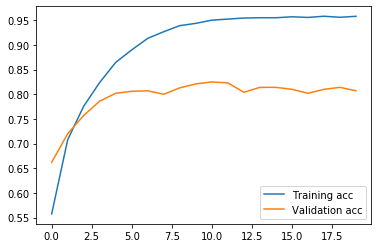

In [25]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
plt.plot(acc_values, label='Training acc')
plt.plot(val_acc_values, label='Validation acc')
plt.legend()

In [26]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 58us/sample - loss: 1.2182 - accuracy: 0.7863


In [27]:
results

[1.2182295502877512, 0.7862867]

In [28]:
predictions = model.predict(x_test)

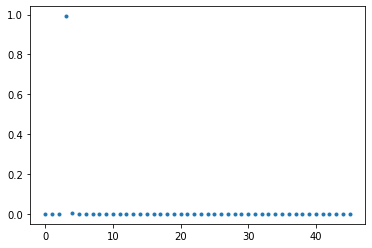

In [30]:
plt.plot(predictions[0], '.')

# Learnings
- If you classify n classes, end with a dense layer size n.
- Multiclass should end with softmax.
- Categorical crossentropy is good for multiclass classification.
- One-hot encoding is good.
- Avoid intermediate layers that are smaller than the final layer.